In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('C:\\Users\\Manish\\Downloads\\case_study_data.xlsx')

In [3]:
df.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,31.449,18.055564,6.0,18.00,27.0,36.0,108.0
amount,1000.0,4907.134,4234.100176,375.0,2048.25,3479.5,5958.5,27636.0
inst_rate,1000.0,4.606,1.572016,2.0,3.00,5.0,6.0,6.0
residing_since,1000.0,4.407,1.570292,2.0,3.00,5.0,6.0,6.0
age,1000.0,53.566,17.065664,29.0,41.00,50.0,63.0,113.0
num_credits,1000.0,2.441,0.697858,2.0,2.00,2.0,3.0,6.0
dependents,1000.0,2.155,0.362086,2.0,2.00,2.0,2.0,3.0
status,1000.0,1.300,0.458487,1.0,1.00,1.0,2.0,2.0


In [7]:
df.describe(include='object').T

,count,unique,top,freq
checkin_acc,1000,4,A14,394
credit_history,1000,5,A32,530
purpose,1000,10,A43,280
svaing_acc,1000,5,A61,603
present_emp_since,1000,5,A73,339
personal_status,1000,4,A93,548
other_debtors,1000,3,A101,907
property,1000,4,A123,332
inst_plans,1000,3,A143,814
housing,1000,3,A152,713


In [8]:
df['status'].value_counts()

1    700
2    300
Name: status, dtype: int64

In [9]:
df.groupby(['status'])['other_debtors'].value_counts()

status  other_debtors
1       A101             635
        A103              42
        A102              23
2       A101             272
        A102              18
        A103              10
Name: other_debtors, dtype: int64

<AxesSubplot:xlabel='status', ylabel='amount'>

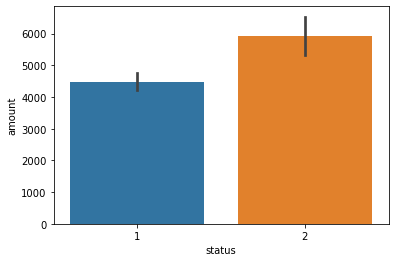

In [10]:
sns.barplot(x = 'status', y = 'amount',data = df)

<AxesSubplot:xlabel='status', ylabel='duration'>

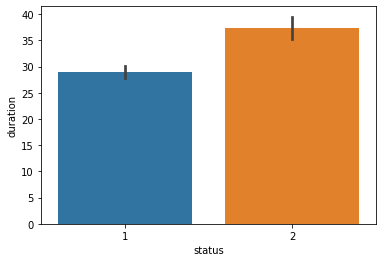

In [11]:
sns.barplot(x = 'status', y = 'duration',data = df)

<AxesSubplot:xlabel='duration', ylabel='amount'>

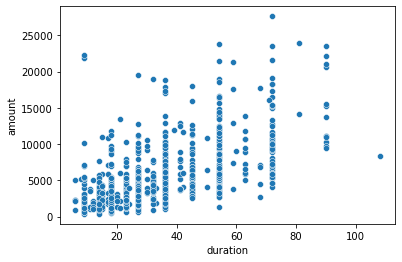

In [12]:
sns.scatterplot(x = 'duration', y = 'amount', data = df)

In [13]:
df.groupby(['status','duration'])['amount'].agg(['min','max','mean'])

min    max          mean
status duration                            
1      6           902   5070   2494.500000
       8          5172   5172   5172.000000
       9           375  10142   2100.515152
       11         1095   3864   2669.000000
       12         1097   5097   2093.666667
       14          414   5748   2669.714286
       15         1091  10962   2888.200000
       17         1731  10842   4572.111111
       18          509  11208   2720.592308
       20         1323   3152   2321.250000
       21         1203   5960   3092.666667
       23          588   7986   3248.096154
       24         1763   1763   1763.000000
       27          944  12707   4158.098592
       30         3318  10586   6915.428571
       32          857   7872   4198.333333
       33         1925   4013   2969.000000
       36         1076  13916   4808.000000
       39        11949  11949  11949.000000
       41         3663  12920   7087.125000
       42         4115  11736   7925.500000
       45         2573  15935   6492.629630
       50         4146  10880   7513.000000
       54         1364  23786   8302.695652
       59         3854  21269  13911.250000
       63         5091  13925   9151.250000
       68         6864   6864   6864.000000
       71        16083  16083  16083.000000
       72         4127  19124  10756.350000
       81        14154  14154  14154.000000
       90         9791  23480  15647.571429
2      9           650  22344   6944.444444
       12         1856   1856   1856.000000
       14          981   7694   2328.642857
       15         1860   3315   2379.666667
       18          914  11798   2577.510204
       21        13467  13467  13467.000000
       23         1203  10275   3655.500000
       24         3938   3938   3938.000000
       27          650  19464   3941.880952
       30         3353   3353   3353.000000
       32         1782  19020   5572.444444
       36         1373  18869   4997.321429
       41         3780  12477   6785.000000
       42         6009   6009   6009.000000
       45         2862  17997   7259.461538
       50         6422   6422   6422.000000
       54         2729  21477   9020.216216
       59         7400   7400   7400.000000
       60         8997   8997   8997.000000
       63         5948  10761   7754.666667
       68         2768  17724   8039.500000
       72         4577  27636  11360.285714
       81        23918  23918  23918.000000
       90         9432  22173  14159.666667
       108        8393   8393   8393.000000

In [14]:
df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [15]:
df['inst_rate'].unique()

array([6, 3, 5, 2], dtype=int64)

In [16]:
df.groupby(['status'])['inst_rate'].value_counts()

status  inst_rate
1       6            317
        3            169
        5            112
        2            102
2       6            159
        3             62
        5             45
        2             34
Name: inst_rate, dtype: int64

In [17]:
df.groupby(['status'])['inst_rate'].value_counts()/df.groupby(['status'])['inst_rate'].count()

status  inst_rate
1       6            0.452857
        3            0.241429
        5            0.160000
        2            0.145714
2       6            0.530000
        3            0.206667
        5            0.150000
        2            0.113333
Name: inst_rate, dtype: float64

In [18]:
x = df.groupby(['status'])['inst_plans'].value_counts()/df.groupby(['status'])['inst_plans'].count()

In [19]:
x

status  inst_plans
1       A143          0.842857
        A141          0.117143
        A142          0.040000
2       A143          0.746667
        A141          0.190000
        A142          0.063333
Name: inst_plans, dtype: float64

In [20]:
x.values

array([0.84285714, 0.11714286, 0.04      , 0.74666667, 0.19      ,
       0.06333333])

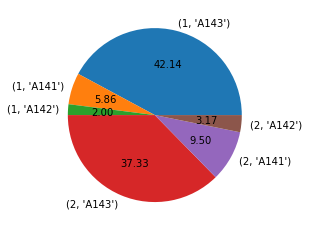

In [21]:
plt.pie(x.values,labels = x.index,autopct = '%.2f');

In [22]:
df.groupby(['status'])['property'].value_counts()

status  property
1       A123        230
        A121        222
        A122        161
        A124         87
2       A123        102
        A122         71
        A124         67
        A121         60
Name: property, dtype: int64

In [23]:
df.groupby(['status'])['credit_history'].value_counts()

status  credit_history
1       A32               361
        A34               243
        A33                60
        A31                21
        A30                15
2       A32               169
        A34                50
        A31                28
        A33                28
        A30                25
Name: credit_history, dtype: int64

In [24]:
df.job.unique()

array(['A173', 'A172', 'A174', 'A171'], dtype=object)

In [25]:
df.apply(lambda x:x.unique())

checkin_acc                                       [A11, A12, A14, A13]
duration             [9, 72, 18, 63, 36, 54, 45, 23, 14, 15, 11, 90...
credit_history                               [A34, A32, A33, A30, A31]
purpose              [A43, A46, A42, A40, A41, A49, A44, A45, A410,...
amount               [1754, 8927, 3144, 11823, 7305, 13583, 4253, 1...
svaing_acc                                   [A65, A61, A63, A64, A62]
present_emp_since                            [A75, A73, A74, A71, A72]
inst_rate                                                 [6, 3, 5, 2]
personal_status                                   [A93, A92, A91, A94]
other_debtors                                       [A101, A103, A102]
residing_since                                            [6, 3, 5, 2]
property                                      [A121, A122, A124, A123]
age                  [101, 33, 74, 68, 80, 53, 92, 42, 38, 36, 90, ...
inst_plans                                          [A143, A141, A142]
housin

In [26]:
df_obj = pd.get_dummies(df)
df_obj

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,9,1754,6,6,101,3,2,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,72,8927,3,3,33,2,2,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,18,3144,3,5,74,2,3,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,63,11823,3,6,68,2,3,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,36,7305,5,6,80,3,3,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,2,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
996,45,5786,6,6,60,2,2,1,1,0,...,1,0,0,0,0,1,0,1,1,0
997,18,1206,6,6,57,2,2,1,0,0,...,1,0,0,0,1,0,1,0,1,0
998,68,2768,6,6,35,2,2,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [27]:
df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [28]:
df_obj.columns

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'dependents', 'status', 'checkin_acc_A11',
       'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'credit_history_A30', 'credit_history_A31', 'credit_history_A32',
       'credit_history_A33', 'credit_history_A34', 'purpose_A40',
       'purpose_A41', 'purpose_A410', 'purpose_A42', 'purpose_A43',
       'purpose_A44', 'purpose_A45', 'purpose_A46', 'purpose_A48',
       'purpose_A49', 'svaing_acc_A61', 'svaing_acc_A62', 'svaing_acc_A63',
       'svaing_acc_A64', 'svaing_acc_A65', 'present_emp_since_A71',
       'present_emp_since_A72', 'present_emp_since_A73',
       'present_emp_since_A74', 'present_emp_since_A75', 'personal_status_A91',
       'personal_status_A92', 'personal_status_A93', 'personal_status_A94',
       'other_debtors_A101', 'other_debtors_A102', 'other_debtors_A103',
       'property_A121', 'property_A122', 'property_A123', 'property_A124',
       'inst_plans_A141',

In [29]:
df.shape

(1000, 21)

In [30]:
df_obj

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,9,1754,6,6,101,3,2,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,72,8927,3,3,33,2,2,2,0,1,...,1,0,0,0,1,0,1,0,1,0
2,18,3144,3,5,74,2,3,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,63,11823,3,6,68,2,3,1,1,0,...,0,1,0,0,1,0,1,0,1,0
4,36,7305,5,6,80,3,3,2,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,2,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
996,45,5786,6,6,60,2,2,1,1,0,...,1,0,0,0,0,1,0,1,1,0
997,18,1206,6,6,57,2,2,1,0,0,...,1,0,0,0,1,0,1,0,1,0
998,68,2768,6,6,35,2,2,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
x = df_obj.drop(columns = ['status'])
y = df_obj.status

In [34]:
from collections import Counter

In [35]:
s = SMOTE()
x_smote,y_smote = s.fit_resample(x,y)

In [36]:
Counter(y_smote)

Counter({1: 700, 2: 700})

In [37]:
x_smote.shape

(1400, 61)

In [38]:
y_smote.shape

(1400,)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
x_smote.iloc[:,:7]

,duration,amount,inst_rate,residing_since,age,num_credits,dependents
0,9,1754,6,6,101,3,2
1,72,8927,3,3,33,2,2
2,18,3144,3,5,74,2,3
3,63,11823,3,6,68,2,3
4,36,7305,5,6,80,3,3
...,...,...,...,...,...,...,...
1395,54,14000,2,3,38,2,2
1396,22,1898,3,2,41,2,2
1397,35,2906,5,4,47,2,2
1398,18,1096,6,5,46,2,2


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size = 0.03,random_state = 123)

In [43]:
x_train.shape

(1358, 61)

In [44]:
x_test.shape

(42, 61)

In [45]:
y_train.shape

(1358,)

In [46]:
y_test.shape

(42,)

In [47]:
from sklearn.linear_model import LogisticRegression

In [54]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\Manish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = logreg.predict(x_test)
y_pred

array([2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2],
      dtype=int64)

In [50]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [51]:
confusion_matrix(y_test,y_pred)

array([[17,  5],
       [ 4, 16]], dtype=int64)

In [52]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred1 = dtc.predict(x_test)
y_pred1

array([1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2],
      dtype=int64)

In [58]:
confusion_matrix(y_test,y_pred1)

array([[17,  5],
       [ 5, 15]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred1)

0.7619047619047619

In [60]:
cls = classification_report(y_test,y_pred1)

In [62]:
print(cls)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        22
           2       0.75      0.75      0.75        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42

